# **Content-aware image restoration (CARE) 2D**

<font size = 4>CARE is a neural network capable of image restauration from corrupted bio-images, first published in 2018 by [Weigert *et al.* in Nature Methods](https://www.nature.com/articles/s41592-018-0216-7). The network allows image denoising and resolution improvement in 2D and 3D images, in a supervised training manner. The function of the network is essentially determined by the set of images provided in the training dataset. For instance, if noisy images are provided as input and high signal-to-noise ratio images are provided as targets, the network will perform denoising.


---

*Disclaimer*:

This notebook is part of the *Zero-Cost Deep-Learning to Enhance Microscopy* project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

This notebook is based on the following paper: 

**Content-aware image restoration: pushing the limits of fluorescence microscopy**, Nature Methods, Volume 15. pages 1090–1097(2018) by *Martin Weigert, Uwe Schmidt, Tobias Boothe, Andreas Müller, Alexandr Dibrov, Akanksha Jain, Benjamin Wilhelm, Deborah Schmidt, Coleman Broaddus, Siân Culley, Mauricio Rocha-Martins, Fabián Segovia-Miranda, Caren Norden, Ricardo Henriques, Marino Zerial, Michele Solimena, Jochen Rink, Pavel Tomancak, Loic Royer, Florian Jug & Eugene W. Myers* (https://www.nature.com/articles/s41592-018-0216-7)

And source code found in: https://github.com/csbdeep/csbdeep

For a more in-depth description of the features of the network,please refer to [this guide](http://csbdeep.bioimagecomputing.com/doc/) provided by the original authors of the work.

We provide a dataset for the training of thi notebook as a way to test its functionalities but the training and test data of the restoration experiments is also available from the authors of the original paper [here](https://publications.mpi-cbg.de/publications-sites/7207/).


**Please also cite this original paper when using or developing this notebook.**

# **How to use this notebook?**

---
###**Structure of a notebook**

A notebook is conveniently made of text annotation that describe the code and workflow (**Text cells**) as well as sections that contain the code that is executed (**Code cells**).  

**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

On the top left side of the notebook you find three tabs which contain from top to bottom the table of contents, code snippets and files.

*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

#**0. Before getting started**
---
<font size = 4>

Before you run the notebook, please ensure that you are logged into your Google account and have the training and/or data to process in your Google Drive.

**Important Notes**
For CARE to train, it needs to have access to a paired training dataset. This means that the same image needs to be acquired in the two conditions (for instance, low signal-to-noise ratio and high signal-to-noise ratio) and provided with indication of correspondence.

Therefore, the data structure is important. It is necessary that all the input data are in the same folder and that all the output data is in a separate folder. The provided training dataset is already split in two folders called "Training - Low SNR images" (Training_source) and "Training - high SNR images" (Training_target).

Additionally, the corresponding input and output files need to have **the same name**.

Please note that you currently can **only use .tif files!**

You can also provide a folder that contains the data that you wish to analyse with the trained network once all training has been performed. This can include Test dataset for which you have the equivalent output and can compare to what the network provides.

Here's a common data structure that can work:

*   Data
    - Training dataset
      - Training - Low SNR images (Training_source)
        - img_1.tif, img_2.tif, ...
      - Training - high SNR images (Training_target)
        - img_2.tif, img_2.tif, ...
    - Test dataset 
    - Results


The **Results** folder will contain the processed images, trained model and network parameters as csv file. Your original images remain unmodified.

---


# **1. Set the Runtime type and mount your Google Drive**



### **1.1. Change the Runtime type**



Go to **Runtime -> Change the Runtime type**

**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

**Accelator: GPU** *(Graphics processing unit (GPU)*


In [1]:
#@title Run this cell to check if you have GPU access
%tensorflow_version 1.x

import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime settings are correct then Google did not allocate GPU to your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')

You have GPU access


### **1.2. Mount Google Drive**
<font size = 4> To use this notebook on the provided data, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will allow Colab to have access to teh data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [2]:
#@markdown ###Mount Google Drive.

#mounts user's Google Drive to Google Colab.

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# **2. Install CARE and Dependencies**


In [3]:
#@markdown ### Install CARE and dependencies

#Libraries contains information of certain topics. 
#For example the tifffile library contains information on how to handle tif-files.

#Here, we install libraries which are not already included in Colab.
!pip install tifffile # contains tools to operate tiff-files
!pip install csbdeep  # contains tools for restoration of fluorescence microcopy images (Content-aware Image Restoration, CARE). It uses Keras and Tensorflow.

#Here, we import and enable Tensorflow 1 instead of Tensorflow 2.
%tensorflow_version 1.x
import tensorflow
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(tensorflow.__version__)
print("Tensorflow enabled.")

#Here, we import all libraries necessary for this notebook.
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from tifffile import imread, imsave
from csbdeep.utils import download_and_extract_zip_file, plot_some, axes_dict, plot_history, Path, download_and_extract_zip_file
from csbdeep.data import RawData, create_patches 
from csbdeep.io import load_training_data, save_tiff_imagej_compatible
from csbdeep.models import Config, CARE
from csbdeep import data
from pathlib import Path
import os, random
import shutil
import pandas as pd
import csv

!pip install memory_profiler
%load_ext memory_profiler

print("Depencies installed and imported.")

     |████████████████████████████████| 133kB 37.7MB/s 
     |████████████████████████████████| 18.1MB 192kB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
Instructions for updating:
non-resource variables are not supported in the long term
1.15.0
Tensorflow enabled.


Using TensorFlow backend.


  Created wheel for memory-profiler: filename=memory_profiler-0.57.0-cp36-none-any.whl size=28992 sha256=945d7fbc10d64d5b5ad89f4b8f9cebae37f8f4b47af669ceb7270c8de47a4eaa
  Stored in directory: /root/.cache/pip/wheels/74/20/b5/20964ef97be73d2c3a695c9cad7bccd96d1e3e737a8163861f
Successfully built memory-profiler
Depencies installed and imported.


# **3. Select your paths and parameters**

---

The code below allows the user to enter the paths to where the training data is and to define the training parameters.


<font size = 5> **Paths for training data and models**

<font size = 4>**`Training_source:`, `Training_target`:** These are the paths to your folders containing the Training_source (Low SNR images) and Training_target (High SNR images or ground truth) training data respecively. To find the paths of the folders containing the respective datasets, go to your Files on the left of the notebook, navigate to the folder containing your files and copy the path by right-clicking on the folder, **Copy path** and pasting it into the right box below.

<font size = 4>**`model_name`:** Use only my_model -style, not my-model. 

<font size = 4>**`model_path`**: Enter the path where your model will be saved once trained (for instance your result folder)


<font size = 5>**Training Parameters**

<font size = 4>**`number_of_steps`:** Good network training may require at least 300 steps but will take a while. **Default value: 100**

<font size = 4>**`number_of_epochs`:** Input how many epochs (rounds) network will be trained. A larger number of epochs may improve performance but risks overfitting to the training data. Start with 30-100 and test the performance after training (see 4.8.). **Default value: 30**

<font size = 4>**`patch_size`:** CARE divides the image into patches for training. Input the size of the patches (length of a side). The value should be smaller than the dimensions of the image and divisible by 8. **Default value: 32 or 64**

<font size = 4>**`number_of_pacthes`:** Input the number of the patches per image. Increasing the number of patches allows for larger training datasets. **Default value: 1024** 

<font size = 4>**Decreasing the patch size or increasing the number of patches may improve the training but may also increase the training time.**

In [13]:
#@markdown ###Path to training images:

# base folder of GT and low images
base = "/content/gdrive/My Drive/Zero-Cost Deep-Learning to Enhance Microscopy/Notebooks to be tested/CARE 2D/Nucleus_datasets/train"
training_data = base+"/my_training_data.npz"

# low SNR images
# low = "/content/gdrive/My Drive/Work/manuscript/Ongoing Projects/Zero-Cost Deep-Learning to Enhance Microscopy/Notebooks to be tested/Training datasets/CARE (2D)/Training - Low SNR images" #@param {type:"string"}
Training_source = "/content/gdrive/My Drive/Zero-Cost Deep-Learning to Enhance Microscopy/test folder/Training datasets/CARE (2D)/Training - Low SNR images" #@param {type:"string"}
#compatibility to easily change the name of the parameters
Input_data_folder = Training_source
InputFile = Input_data_folder+"/*.tif"

# Ground truth images
# GT = "/content/gdrive/My Drive/Work/manuscript/Ongoing Projects/Zero-Cost Deep-Learning to Enhance Microscopy/Notebooks to be tested/Training datasets/CARE (2D)/Training - High SNR images" #@param {type:"string"}
Training_target = "/content/gdrive/My Drive/Zero-Cost Deep-Learning to Enhance Microscopy/test folder/Training datasets/CARE (2D)/Training - High SNR images" #@param {type:"string"}
#compatibility to easily change the name of the parameters
Output_data_folder = Training_target
OutputFile = Output_data_folder+"/*.tif"

# model name and path
#@markdown ###Name of the model and path to model folder:
model_name = "CARE2D_JJ" #@param {type:"string"}
model_path = "/content/gdrive/My Drive/Zero-Cost Deep-Learning to Enhance Microscopy/test folder/Training datasets/CARE (2D)/Results" #@param {type:"string"}

# other parameters for training.
#@markdown ###Training Parameters
#@markdown Number of steps and epochs:
number_of_steps =  5 #@param {type:"number"}
number_of_epochs = 10 #@param {type:"number"}
#@markdown Patch size (pixels) and number
patch_size = 64 #@param {type:"number"} # in pixels
# width = size
number_of_patches =   1024#@param {type:"number"}
#@markdown Number of validation images (%):
percentage =  5 #@param {type:"number"}
percentage = percentage/100

#compatibility to easily change the name of the parameters

# The shape of the images.
x = imread(InputFile)
y = imread(OutputFile)

print('Loaded Input images (number, width, length) =', x.shape)
print('Loaded Output images (number, width, length) =', y.shape)
print("Parameters initiated.")

# # create the plot
# plt.figure(figsize=(16,10))
# plot_some(np.stack([x,y]),
#           title_list=[['Example of input image','Example of output image']], 
#           pmin=2,pmax=99.8);


# This will display a randomly chosen dataset input and output
random_choice = random.choice(os.listdir(Input_data_folder))
x = imread(Input_data_folder+"/"+random_choice)

os.chdir(Output_data_folder)
y = imread(Output_data_folder+"/"+random_choice)

f=plt.figure(figsize=(20,40))
plt.subplot(1,2,1)

plt.imshow(x, interpolation='nearest')
plt.title('Input')
plt.subplot(1,2,2)

plt.imshow(y, interpolation='nearest')
plt.title('Output')


Output hidden; open in https://colab.research.google.com to view.

# **4. Train the network**


### **4.1. Prepare the training data and model for training**
<font size = 4>Here, we use the information from 3. to build the model and convert the training data into a suitable format for training.

   22 raw images x    1 transformations   =    22 images
   22 images     x 1024 patches per image = 22528 patches in total
Input data:
/content/gdrive/My Drive/Zero-Cost Deep-Learning to Enhance Microscopy/Notebooks to be tested/CARE 2D/Nucleus_datasets/train: target='/content/gdrive/My Drive/Zero-Cost Deep-Learning to Enhance Microscopy/test folder/Training datasets/CARE (2D)/Training - High SNR images', sources=['/content/gdrive/My Drive/Zero-Cost Deep-Learning to Enhance Microscopy/test folder/Training datasets/CARE (2D)/Training - Low SNR images'], axes='CYX', pattern='*.tif*'
Transformations:
1 x Identity
Patch size:
64 x 64


100%|██████████| 22/22 [00:02<00:00,  7.24it/s]


Creating 2D training dataset
number of training images:	 21402
number of validation images:	 1126
image size (2D):		 (64, 64)
axes:				 SYXC
channels in / out:		 1 / 1
peak memory: 5407.50 MiB, increment: 0.28 MiB
Config(axes='YXC', n_channel_in=1, n_channel_out=1, n_dim=2, probabilistic=True, train_batch_size=64, train_checkpoint='weights_best.h5', train_checkpoint_epoch='weights_now.h5', train_checkpoint_last='weights_last.h5', train_epochs=10, train_learning_rate=0.0004, train_loss='laplace', train_reduce_lr={'factor': 0.5, 'patience': 10, 'min_delta': 0}, train_steps_per_epoch=5, train_tensorboard=True, unet_input_shape=(None, None, 1), unet_kern_size=5, unet_last_activation='linear', unet_n_depth=3, unet_n_first=32, unet_residual=True)


/usr/local/lib/python3.6/dist-packages/csbdeep/models/base_model.py:134: UserWarning: output path for model already exists, files may be overwritten: /content/gdrive/My Drive/Zero-Cost Deep-Learning to Enhance Microscopy/test folder/Training datasets/CARE (2D)/Results/CARE2D_JJ
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))


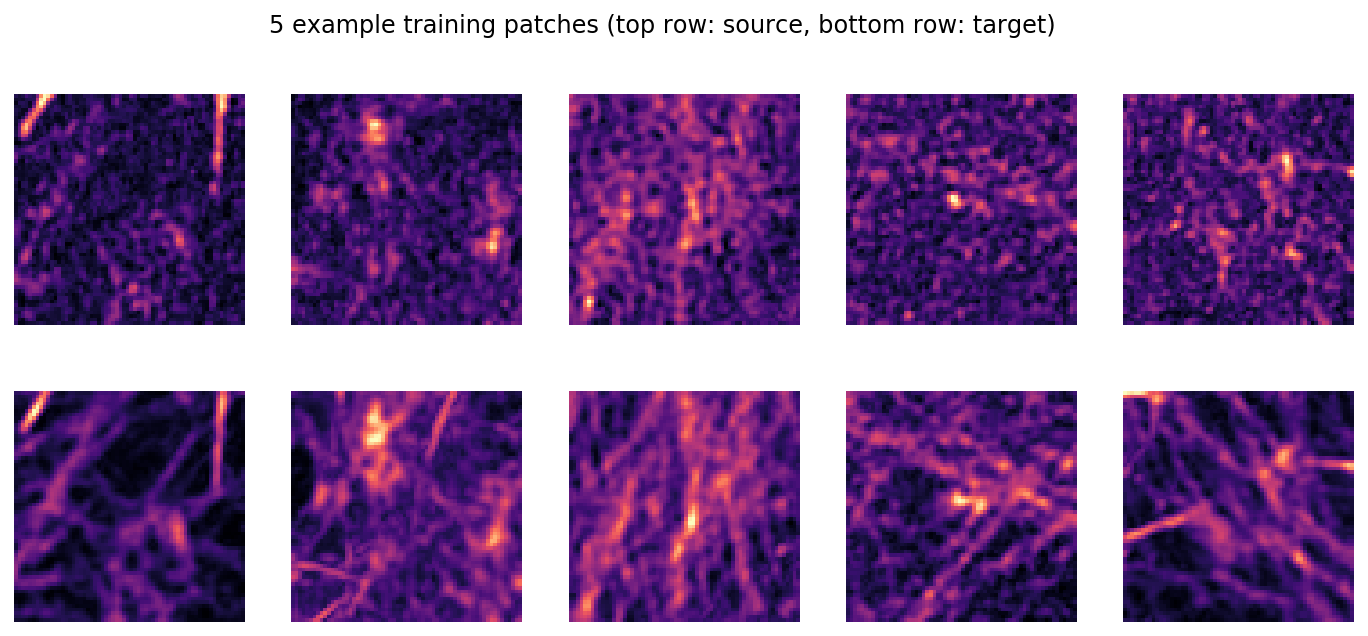

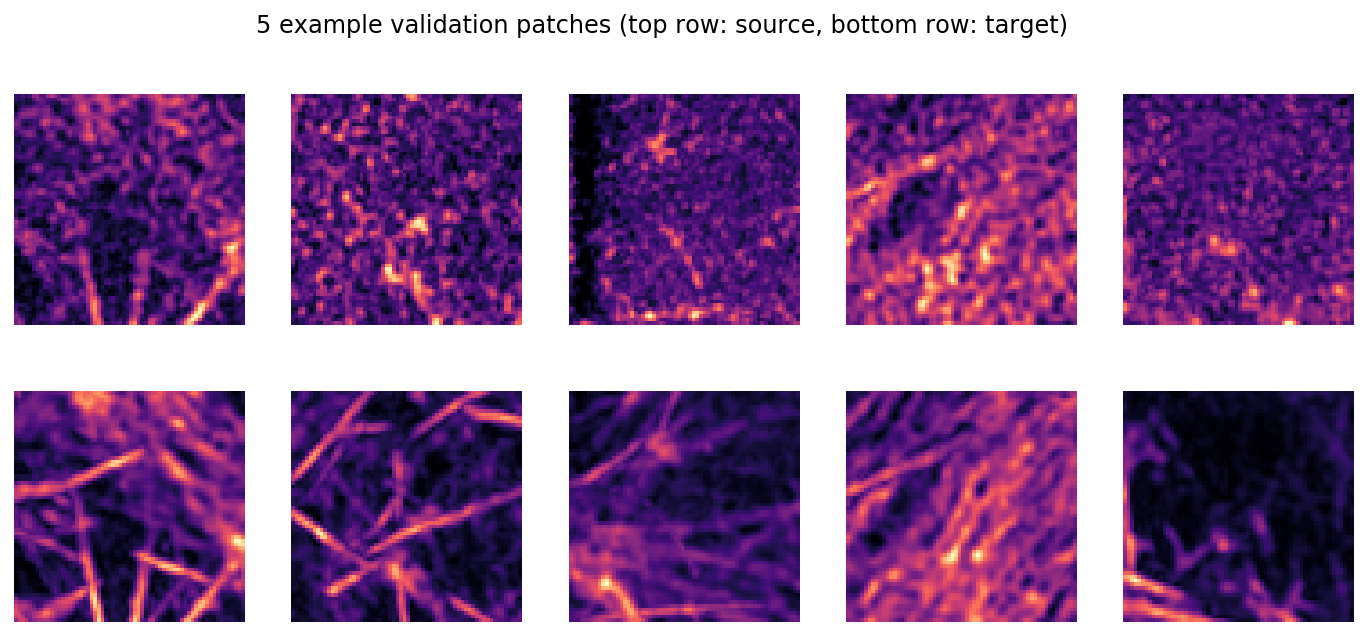

In [20]:
#@markdown ###Create the model and dataset objects
# The code in this cell is inspired by that from the authors' repository (https://github.com/CSBDeep/CSBDeep).

# RawData Object

# This object holds the image pairs (GT and low), ensuring that CARE compares corresponding images.
# This file is saved in .npz format and later called when loading the trainig data.

raw_data = data.RawData.from_folder(basepath=base, source_dirs=[Input_data_folder], target_dir=Output_data_folder, axes='CYX', pattern='*.tif*')
X, Y, XY_axes = data.create_patches(raw_data, patch_filter=None, patch_size=(patch_size,patch_size), n_patches_per_image=number_of_patches)
print ('Creating 2D training dataset')
training_path = model_path+"/rawdata"
rawdata1 = training_path+".npz"
np.savez(training_path,X=X, Y=Y, axes=XY_axes)

# Load Training Data

(X,Y), (X_val,Y_val), axes = load_training_data(rawdata1, validation_split=percentage, verbose=True)
c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]

%memit 
# Plot example patches

#plot of training patches.
plt.figure(figsize=(12,5))
plot_some(X[:5],Y[:5])
plt.suptitle('5 example training patches (top row: source, bottom row: target)');

#plot of validation patches
plt.figure(figsize=(12,5))
plot_some(X_val[:5],Y_val[:5])
plt.suptitle('5 example validation patches (top row: source, bottom row: target)');

# Config Object:

# Here, we create the default Config object which sets the hyperparameters of the network training.
# In this case, we use the default settings from the paper. 
# More experienced users may want to experiment with these settings.

# Hyperparameters of the network training in the config file: 
# learning rate, 
# number of parameter updates per epoch,  
# is the model is probabilistic or not,
# number of neural network layers (unet_n_depth),
# kernel size (unet_kern_size - i.e. the size of the convolution filter)

# Do not change these default unless the notebooks crashes because of the defaults.

config = Config(axes, n_channel_in, n_channel_out, probabilistic=True, train_steps_per_epoch=number_of_steps, train_epochs=number_of_epochs, unet_kern_size=5, unet_n_depth=3, train_batch_size=patch_size, train_learning_rate=0.0004)

print(config)
vars(config)

# Compile the CARE model for network training

model_training= CARE(config, model_name, basedir=model_path)

### **4.2. Train the network**
<font size = 4>When playing the cell below you should see updates after each epoch (round). Network training can take some time.

<font size = 4>* **CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training time must be less than 12 hours! If training takes longer than 12 hours, please decrease the number of epochs or number of patches. Another way circumvent this is to save the parameters of the model after training and start training again from this point.

In [15]:
#@markdown ###Start Training

# Start Training
history = model_training.train(X,Y, validation_data=(X_val,Y_val))

print("Training, done.")

/usr/local/lib/python3.6/dist-packages/csbdeep/models/care_standard.py:153: UserWarning: small number of validation images (only 5.0% of all images)
  warnings.warn("small number of validation images (only %.1f%% of all images)" % (100*frac_val))


Epoch 1/10
5/5 [==============================] - 2s 489ms/step - loss: 0.9019 - mse: 0.0380 - mae: 0.1383 - val_loss: 0.2233 - val_mse: 0.0193 - val_mae: 0.1012
Epoch 2/10
5/5 [==============================] - 2s 306ms/step - loss: 0.3704 - mse: 0.0204 - mae: 0.1041 - val_loss: 0.4176 - val_mse: 0.0184 - val_mae: 0.0984
Epoch 3/10
5/5 [==============================] - 2s 307ms/step - loss: 0.4156 - mse: 0.0200 - mae: 0.1027 - val_loss: 0.3941 - val_mse: 0.0205 - val_mae: 0.1059
Epoch 4/10
5/5 [==============================] - 2s 306ms/step - loss: 0.3650 - mse: 0.0260 - mae: 0.1226 - val_loss: 0.2996 - val_mse: 0.0316 - val_mae: 0.1394
Epoch 5/10
5/5 [==============================] - 2s 306ms/step - loss: 0.0870 - mse: 0.0234 - mae: 0.1176 - val_loss: -0.0922 - val_mse: 0.0277 - val_mae: 0.1270
Epoch 6/10
5/5 [==============================] - 2s 310ms/step - loss: -0.2278 - mse: 0.0211 - mae: 0.1070 - val_loss: -0.3389 - val_mse: 0.0178 - val_mae: 0.0974
Epoch 7/10
5/5 [=========

### **4.3. Evaluate the training**

<font size = 4>It is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://link.springer.com/article/10.1007%2Fs12551-018-0449-9) by Nichols *et al.* in Biophysical Reviews (2018).

<font size = 4>**Loss** <code>(loss)</code> describes an error value after each epoch for the difference between the model's prediction and its corresponding output target.

<font size = 4>**Validation error** <code>(val_loss)</code> describes the same error value between the model's prediction on a validation image (taken from the input) and compared to its target (from the output).

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease even after further training. Comparing the development of the validation error with the training error can give insights into the model's performance.

<font size = 4>If **validation error is clearly higher than training error**, it means that the training data might be too complex or diverse. In this case, the trained network fails to improve unseen images. To avoid this, increase the number of epochs and check if you can improve your dataset with more examples.

<font size = 4>If **validation error is clearly smaller than training error**, it means that training data is too simple which allows the network to learn the training data perfectly but to perform poorly on unseen data. This is called overfitting which should always be avoided as it can lead to artefacts in the predictions of the network. First steps to avoid this can be to reduce the number of training epochs or to use a larger training dataset.

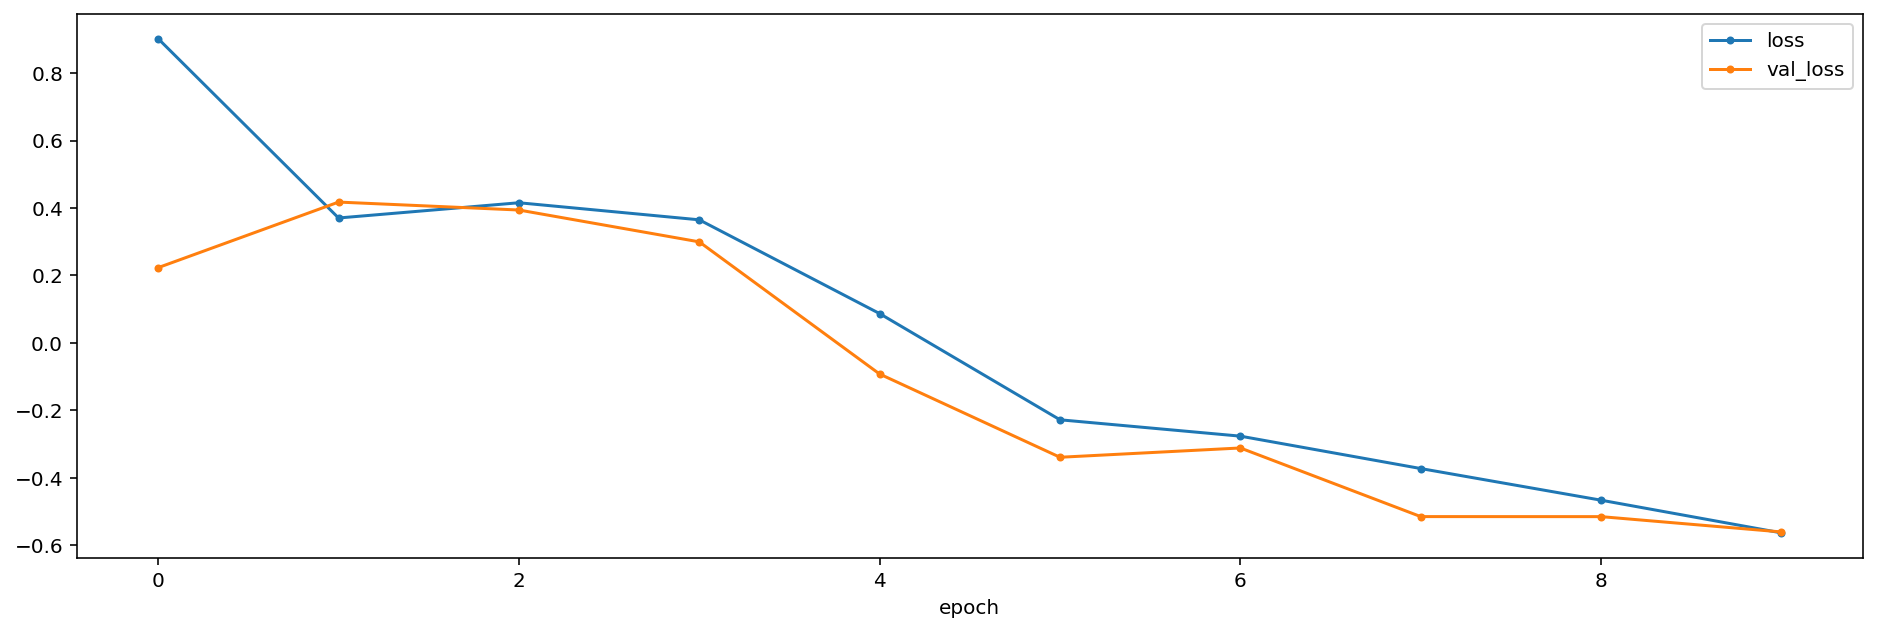

In [16]:
#@markdown ###Play the cell to show a plot of training errors vs. epoch number

# data contains several values and they can be printed by this code. Just remove the #-mark.
# print(sorted(list(history.history.keys()))) 

#@title Play the cell to show figure of training results
# The code is inspired by the original code (https://github.com/CSBDeep/CSBDeep).
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss']);

# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# The figure is saved into content/ as training evaluation.csv (refresh the Files if needed). 
RESULTS = model_path+'/training evaluation.csv'
with open(RESULTS, 'w') as f:
    for key in hist_df.keys():
        f.write("%s,%s\n"%(key,hist_df[key]))

### **4.4. Export model to be used with *CSBDeep Fiji plugins* and *KNIME* workflows (Experimental !!!)**

<font size = 4>This allows you to save the trained model in a format where it can be used in the CSBDeep Fiji Plugin. See https://github.com/CSBDeep/CSBDeep_website/wiki/Your-Model-in-Fiji for details.

<font size = 4>After saving the model to your drive, download the .zip file from your google drive. Do this from your Google Drive and not in the colab interface as this takes very long.

In [0]:
#@markdown ###Play this cell to save a Fiji-compatible model to Google Drive.

# exports the trained model to Fiji.
# The code is from (https://github.com/CSBDeep/CSBDeep).
model_training.export_TF()



Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /tmp/tmpa2okox4r/model/saved_model.pb

Model exported in TensorFlow's SavedModel format:
/content/gdrive/My Drive/Work/manuscript/Ongoing Projects/Zero-Cost Deep-Learning to Enhance Microscopy/test folder/Training datasets/CARE (2D)/Results/CARE2D_myhigh4/TF_SavedModel.zip


### **4.5. Download your model(s) from Google Drive**
The model and its parameters have been saved to your **model_path** on your Google Drive. It is however wise to download the folder as all data can be erased at the next training if using the same folder.

# **5. Use the network**

---

<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First we upload your unseen images and prepare them for prediction. After that we activate your trained model from section 4 and finally we save results into your Google Drive.

### **5.1. Generate prediction from test dataset**

<font size = 4>The current trained model (from section 4.2) can now be used to process images. If an older model needs to be used, please untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Result_folder** folder as restored image stacks (ImageJ-compatible TIFF images).

<font size = 4>**`Test_data_folder`:** This folder should contains the images that you want to predict using the network that you will train.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output images.

In [17]:
#Activate the pretrained model. 
#model_training = CARE(config=None, name=model_name, basedir=model_path)

#@markdown ### Provide the path to your dataset and to the folder where the prediction will be saved, then play the cell to predict output on your unseen images.

#@markdown ###Path to data to analyse and where predicted output should be saved:
Test_data_folder = "/content/gdrive/My Drive/Zero-Cost Deep-Learning to Enhance Microscopy/test folder/Training datasets/CARE (2D)/Test - Low SNR images" #@param {type:"string"}
Result_folder = "/content/gdrive/My Drive/Zero-Cost Deep-Learning to Enhance Microscopy/test folder/Training datasets/CARE (2D)/Results" #@param {type:"string"}


# model name and path
#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please provide the name of the model and path to model folder:
inference_model_name = "CARE2D_myhigh3" #@param {type:"string"}
inference_model_path = "/content/gdrive/My Drive/Work/manuscript/Ongoing Projects/Zero-Cost Deep-Learning to Enhance Microscopy/test folder/Training datasets/CARE (2D)/Results" #@param {type:"string"}

if (Use_the_current_trained_model): 
  print("Using current trained network")
  inference_model_name = model_name
  inference_model_path = model_path
#training_path = model_path+"/"


#Activate the pretrained model. 
model_training = CARE(config=None, name=inference_model_name, basedir=inference_model_path)


# creates a loop, creating filenames and saving them
for filename in os.listdir(Test_data_folder):
  img = imread(os.path.join(Test_data_folder,filename))
  restored = model_training.predict(img, axes='YX')
  os.chdir(Result_folder)
  imsave(filename,restored)

print("Images saved into folder:", Result_folder)

Using current trained network
Loading network weights from 'weights_best.h5'.
Images saved into folder: /content/gdrive/My Drive/Zero-Cost Deep-Learning to Enhance Microscopy/test folder/Training datasets/CARE (2D)/Results


### **5.2. Assess predicted output**



In [18]:
# @markdown ###This piece of code will display a randomly chosen input and its corresponding predicted output.

# This will display a randomly chosen dataset input and predicted output
random_choice = random.choice(os.listdir(Test_data_folder))
x = imread(Test_data_folder+"/"+random_choice)

os.chdir(Result_folder)
y = imread(Result_folder+"/"+random_choice)

f=plt.figure(figsize=(20,40))
plt.subplot(1,2,1)

plt.imshow(x, interpolation='nearest')
plt.title('Input')
plt.subplot(1,2,2)

plt.imshow(y, interpolation='nearest')
plt.title('Predicted output')

Output hidden; open in https://colab.research.google.com to view.

### **5.3. Download your predicted output**

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that notebook will otherwise **OVERWRITE** all files which have the same name.